In [22]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
import torchvision.datasets

In [3]:
def cuda_settings():
    random.seed(0)
    np.random.seed(0)
    torch.manual_seed(0)
    torch.cuda.manual_seed(0)
    torch.backends.cudnn.deterministic = True

In [4]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [5]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [5]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [6]:
X_train = X_train.float()
X_test = X_test.float()

In [ ]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [ ]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

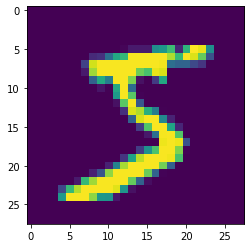

tensor(5)


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [ ]:
# преобразуем двумерный тензор
# 'вытягиваем' в длину

In [7]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [ ]:
X_train

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
X_train.shape

torch.Size([60000, 784])

In [29]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet(100)

In [9]:
torch.cuda.is_available()

True

In [10]:
# проверяем, не занята ли видеокарта некоторыми вычислениями
!nvidia-smi

Sun Feb 26 20:01:34 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [30]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# перекладываем NN на видеокарту
# ф-ю .to наследуем от torch.nn
mnist_net = mnist_net.to(device)

# выводим параметры NN, чтобы проверить, переложились ли они на cuda
list(mnist_net.parameters())

# 1 элемент: все веса 1го слоя
# 2 элемент: все смещения 1го слоя

[Parameter containing:
 tensor([[ 0.0028,  0.0152, -0.0182,  ..., -0.0166, -0.0154,  0.0159],
         [ 0.0259, -0.0169,  0.0232,  ..., -0.0193,  0.0147, -0.0068],
         [-0.0165,  0.0005, -0.0349,  ..., -0.0230,  0.0045, -0.0125],
         ...,
         [ 0.0004,  0.0083, -0.0008,  ...,  0.0009, -0.0134,  0.0261],
         [-0.0338,  0.0005,  0.0327,  ..., -0.0147,  0.0091,  0.0130],
         [ 0.0083, -0.0011, -0.0174,  ...,  0.0124,  0.0075, -0.0185]],
        device='cuda:0', requires_grad=True), Parameter containing:
 tensor([-0.0103, -0.0090,  0.0116, -0.0313, -0.0075, -0.0208, -0.0064, -0.0208,
          0.0078, -0.0345, -0.0181, -0.0225, -0.0324, -0.0321, -0.0017,  0.0214,
          0.0010,  0.0114, -0.0093, -0.0167,  0.0100,  0.0181, -0.0061,  0.0263,
         -0.0147, -0.0356,  0.0125, -0.0136, -0.0112, -0.0081,  0.0044,  0.0161,
         -0.0317,  0.0069,  0.0036,  0.0027,  0.0233, -0.0255, -0.0252, -0.0026,
          0.0157,  0.0293, -0.0134, -0.0047,  0.0044,  0.0034, 

In [31]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [33]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

# перекладываем тестовые данные на видеокарту
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
# permutation per epoch
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        
# Выделяем последовательные участки так, чтобы внутри 1 эпохи каждый элемент 
# (картинка) встречалась 1 раз
# Тренировочные данные перекладываем на видеокарту по батчам
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = mnist_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

# Делаем forward по всему тестовому датасету
# Оптимизация; батчи могут не умещаться на видеокарту 
    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).cpu().detach().numpy())
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().cpu()
    test_accuracy_history.append(accuracy)
    print(accuracy)

tensor(0.9103)
tensor(0.9203)
tensor(0.9200)
tensor(0.9186)
tensor(0.9279)
tensor(0.9284)
tensor(0.9308)
tensor(0.9334)
tensor(0.9348)
tensor(0.9362)
tensor(0.9314)
tensor(0.9368)
tensor(0.9376)
tensor(0.9420)
tensor(0.9372)
tensor(0.9416)
tensor(0.9416)
tensor(0.9396)
tensor(0.9400)
tensor(0.9428)
tensor(0.9423)
tensor(0.9478)
tensor(0.9461)
tensor(0.9408)
tensor(0.9413)
tensor(0.9475)
tensor(0.9405)
tensor(0.9463)
tensor(0.9444)
tensor(0.9459)
tensor(0.9486)
tensor(0.9419)
tensor(0.9435)


KeyboardInterrupt: ignored

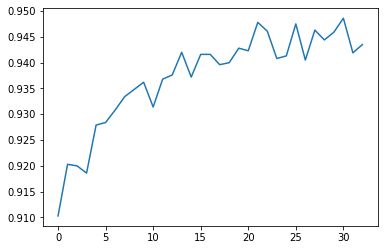

In [35]:
plt.plot(test_accuracy_history)

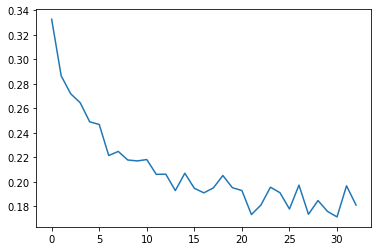

In [36]:
plt.plot(test_loss_history)